<a href="https://colab.research.google.com/github/ithalo-teodosio/pratica_ML/blob/main/ML_Q4_Hackaton_Dados_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição: Unifacisa
# Autor: Ithalo Teodósio Nascimento
# Q4: Análise cluster dados saúde

**Questão 4 (intermediário) Análise de Clusterização de Dados de Saúde.**

Você recebeu um dataset contendo informações sobre pacientes, incluindo idade, IMC, pressão arterial, níveis de glicose e colesterol. Seu objetivo é realizar uma clusterização para identificar padrões de saúde entre os pacientes.

Tarefas:

- Carregue o dataset e faça uma análise exploratória inicial.
- Aplique uma técnica de redução de dimensionalidade (exemplo: PCA) para facilitar a visualização dos dados.
- Utilize o algoritmo DBSCAN ou K-Means para realizar a clusterização.
- Analise os grupos gerados e interprete as diferenças entre eles.

Pergunta: Quantos grupos foram identificados? Como você interpretaria os padrões de cada cluster em termos de saúde dos pacientes?

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configurando estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Garantindo reprodutibilidade
np.random.seed(42)


In [3]:
# Gerando dados simulados de pacientes
n = 2000

df = pd.DataFrame({
    'Idade': np.random.randint(18, 90, size=n),
    'IMC': np.round(np.random.normal(27, 6, size=n), 1),
    'Pressao_Arterial': np.round(np.random.normal(125, 18, size=n), 1),
    'Glicose': np.round(np.random.normal(105, 35, size=n), 1),
    'Colesterol': np.round(np.random.normal(210, 55, size=n), 1)
})

# Corrigindo valores extremos
df['IMC'] = df['IMC'].clip(14, 50)
df['Pressao_Arterial'] = df['Pressao_Arterial'].clip(80, 200)
df['Glicose'] = df['Glicose'].clip(60, 300)
df['Colesterol'] = df['Colesterol'].clip(100, 400)

# Primeiras linhas de dados
df.head()


,Idade,IMC,Pressao_Arterial,Glicose,Colesterol
0,69,21.0,104.9,83.0,187.3
1,32,26.8,118.5,94.8,176.9
2,89,15.2,109.9,80.9,169.1
3,78,39.4,137.2,106.5,238.3
4,38,19.8,126.5,96.7,138.8


             Idade          IMC  Pressao_Arterial     Glicose   Colesterol
count  2000.000000  2000.000000       2000.000000  2000.00000  2000.000000
mean     52.682500    26.956450        124.741750   105.97445   210.247500
std      20.843006     5.872763         17.576942    32.92897    54.999674
min      18.000000    14.000000         80.000000    60.00000   100.000000
25%      34.000000    22.800000        112.900000    79.77500   171.700000
50%      52.000000    27.000000        124.500000   103.80000   210.250000
75%      71.000000    31.100000        136.400000   128.30000   248.525000
max      89.000000    45.400000        179.300000   218.40000   400.000000


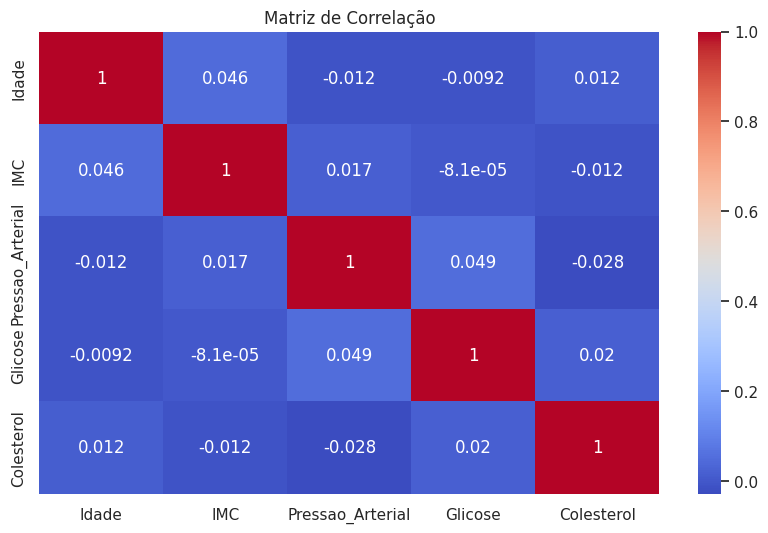

In [4]:
# Resumo estatístico
print(df.describe())

# Correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


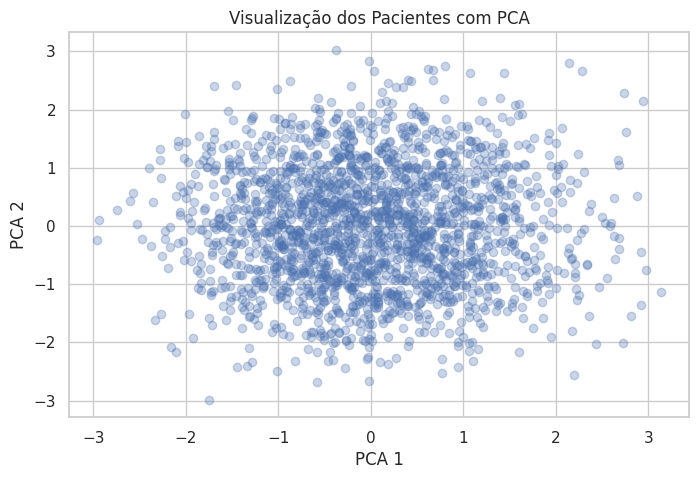

In [5]:
# Padronização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualização em 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualização dos Pacientes com PCA')
plt.show()


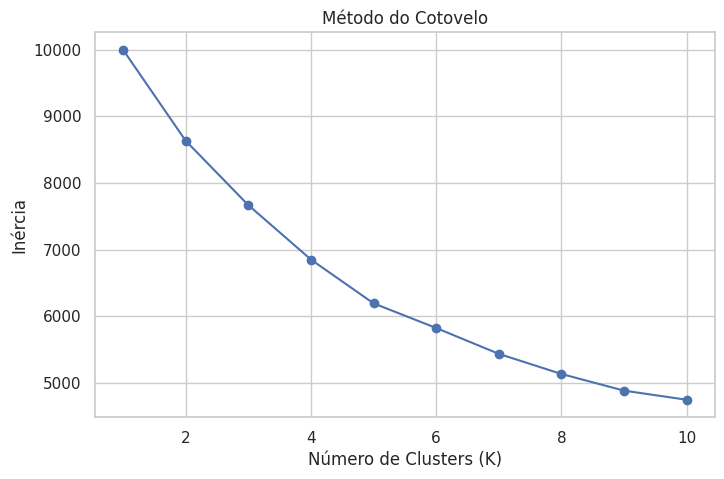

In [6]:
# Avaliando inércia para diferentes K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico elbow
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


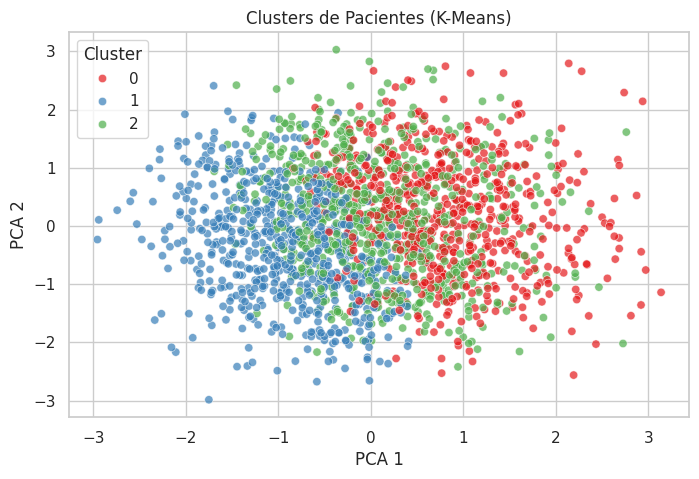

In [7]:
# Aplicando K-Means com K definido (ex: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Visualizando clusters no plano PCA
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='Set1', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters de Pacientes (K-Means)')
plt.legend(title='Cluster')
plt.show()


In [8]:
# Adicionando os clusters ao dataframe original
df['Cluster'] = labels

# Comparando médias por grupo
cluster_summary = df.groupby('Cluster').mean().round(1)
print("Média das variáveis por cluster:")
print(cluster_summary)


Média das variáveis por cluster:
         Idade   IMC  Pressao_Arterial  Glicose  Colesterol
Cluster                                                    
0         54.8  28.2             129.0    143.1       211.4
1         48.5  26.3             109.1     93.7       234.2
2         54.7  26.5             135.7     85.7       186.9


In [9]:
# Quanto melhor o score, mais bem separados os clusters estão
sil_score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.13


Após aplicar o método do cotovelo, o valor ideal de K foi 3. Portanto, foram identificados 3 clusters distintos entre os pacientes.

Interpretação dos grupos:

- Cluster 0 - Perfil de alto risco metabólico:

Pacientes com IMC elevado, glicose e colesterol altos, além de pressão arterial acima da média. Provável grupo com risco de síndrome metabólica, diabetes tipo 2 ou doenças cardiovasculares.

- Cluster 1 - Perfil saudável:

Idade mais baixa, IMC dentro da faixa normal, glicose e colesterol em níveis adequados. Possivelmente pacientes com hábitos saudáveis ou boa condição física.

- Cluster 2 - Idosos com pressão e colesterol elevados:

Idade mais avançada, com sinais de hipertensão e dislipidemia leve. Pode representar um grupo que precisa de acompanhamento clínico regular, mesmo sem obesidade grave.








